In [8]:
import os
from tempfile import tempdir
from termios import TOSTOP
from time import time
from turtle import color
from unittest.mock import NonCallableMagicMock
import pandas as pd
import numpy as np
import warnings
import math
import re

import seaborn as sns
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from pathlib import Path

import tqdm
import importlib

import matplotlib.pyplot as plt
# from PySide2.QtWidgets import QFileDialog, QApplication
# from PySide2.QtCore import Qt
from copy import copy 

from corems.mass_spectra.input import rawFileReader
from corems.molecular_id.factory.classification import HeteroatomsClassification, Labels
from corems.molecular_id.search.priorityAssignment import OxygenPriorityAssignment
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.encapsulation.factory.parameters import MSParameters
from corems.encapsulation.constant import Atoms
from corems.mass_spectrum.calc.Calibration import MzDomainCalibration

import importlib

import corems.lc_icpms_ftms.calc.lc_icrms_qc_assign as icrms

importlib.reload(icrms)



<module 'corems.lc_icpms_ftms.calc.lc_icrms_qc_assign' from '/Users/christiandewey/CoreMS/corems/lc_icpms_ftms/calc/lc_icrms_qc_assign.py'>

In [9]:
##### Set file folder and THERMO RAW file name here:
file_location='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring/400-500/'
#file_location='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2021_August_OC2102A/OC2012A/'
filelist=os.listdir(file_location)
os.chdir(file_location)

MSfiles={}
for file in filelist:
    if '.raw' in file:
        print(file)
        parser = rawFileReader.ImportMassSpectraThermoMSFileReader(file_location+'/'+file)
        MSfiles[file]={'parser': parser}


20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz_221105013731.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500_221104214121.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz_221105005017.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_221105022444.raw


In [10]:
data = icrms.lc_icr_assign(file_location)

print(data._raw_filelist)

['20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz_221105013731.raw', '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500_221104214121.raw', '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz_221105005017.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw', '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw', '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_221105022444.raw']


In [ ]:
data.run_b12_qc(b12_peakrange = [8,10]) 

In [12]:
# 1: assign formula to full scan 
MSParameters.mass_spectrum.threshold_method = 'signal_noise'
MSParameters.mass_spectrum.s2n_threshold = 2
MSParameters.ms_peak.peak_min_prominence_percent = 0.001

MSParameters.molecular_search.error_method = 'None'
MSParameters.molecular_search.min_ppm_error = -0.3
MSParameters.molecular_search.max_ppm_error = 0.3

MSParameters.molecular_search.isProtonated = True
MSParameters.molecular_search.isRadical = False
MSParameters.molecular_search.isAdduct = False

MSParameters.molecular_search.score_method = "prob_score"
MSParameters.molecular_search.output_score_method = "prob_score"


MSParameters.molecular_search.url_database = None
MSParameters.molecular_search.min_dbe = -1
MSParameters.molecular_search.max_dbe = 20

MSParameters.molecular_search.usedAtoms['C'] = (1,50)
MSParameters.molecular_search.usedAtoms['H'] = (4,100)
MSParameters.molecular_search.usedAtoms['O'] = (1,20)
MSParameters.molecular_search.usedAtoms['N'] = (0,4)
#MSParameters.molecular_search.usedAtoms['Cu'] = (0,1)
#MSParameters.molecular_search.usedAtoms['S'] = (0,1)

In [13]:
timerange = [4,30]  # start (min) to stop (min)
interval = 2  # min 
refmasslist = "/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref"

data.assign_formula(interval = interval, timerange = timerange, refmasslist = refmasslist)




20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz_221105013731.raw
1 of 8 files
timestart: 4
MS Obj loaded - 1338 peaks found.
MS Obj loaded - 1338 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  11.46 ms


Loading molecular formula database: 84098it [00:03, 25492.38it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 125.79it/s]


'run_molecular_formula'  4178.73 ms
576 assigned peaks and 762 unassigned peaks, total  = 43.05 %, relative abundance = 39.14 %, RMS error (best candidate) (ppm) = 0.085
timestart: 6
MS Obj loaded - 2608 peaks found.
MS Obj loaded - 2608 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.032 ppm
minimize function performed 264 fn evals and 3 iterations
'runworker'  4.08 ms


Loading molecular formula database: 84098it [00:03, 23527.17it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 65.04it/s]


'run_molecular_formula'  5180.09 ms
1412 assigned peaks and 1196 unassigned peaks, total  = 54.14 %, relative abundance = 58.09 %, RMS error (best candidate) (ppm) = 0.069
timestart: 8
MS Obj loaded - 3507 peaks found.
MS Obj loaded - 3507 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
72 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 168 fn evals and 2 iterations
'runworker'  4.41 ms


Loading molecular formula database: 84098it [00:04, 20848.48it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 47.50it/s]


'run_molecular_formula'  6216.98 ms
1953 assigned peaks and 1554 unassigned peaks, total  = 55.69 %, relative abundance = 63.18 %, RMS error (best candidate) (ppm) = 0.052
timestart: 10
MS Obj loaded - 3843 peaks found.
MS Obj loaded - 3843 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
173 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  3.99 ms


Loading molecular formula database: 84098it [00:03, 21525.00it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 43.42it/s]


'run_molecular_formula'  6288.77 ms
2347 assigned peaks and 1496 unassigned peaks, total  = 61.07 %, relative abundance = 70.47 %, RMS error (best candidate) (ppm) = 0.045
timestart: 12
MS Obj loaded - 4248 peaks found.
MS Obj loaded - 4248 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
199 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  4.03 ms


Loading molecular formula database: 84098it [00:04, 20312.70it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 38.15it/s]


'run_molecular_formula'  6846.35 ms
2688 assigned peaks and 1560 unassigned peaks, total  = 63.28 %, relative abundance = 74.39 %, RMS error (best candidate) (ppm) = 0.047
timestart: 14
MS Obj loaded - 4577 peaks found.
MS Obj loaded - 4577 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
235 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 320 fn evals and 6 iterations
'runworker'  4.11 ms


Loading molecular formula database: 84098it [00:04, 20779.30it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 35.37it/s]


'run_molecular_formula'  6961.96 ms
3007 assigned peaks and 1570 unassigned peaks, total  = 65.70 %, relative abundance = 78.53 %, RMS error (best candidate) (ppm) = 0.047
timestart: 16
MS Obj loaded - 4580 peaks found.
MS Obj loaded - 4580 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
251 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  4.33 ms


Loading molecular formula database: 84098it [00:04, 19599.96it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 35.91it/s]


'run_molecular_formula'  7159.42 ms
2980 assigned peaks and 1600 unassigned peaks, total  = 65.07 %, relative abundance = 80.88 %, RMS error (best candidate) (ppm) = 0.057
timestart: 18
MS Obj loaded - 5111 peaks found.
MS Obj loaded - 5111 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
267 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 3034 fn evals and 69 iterations
'runworker'  4.35 ms


Loading molecular formula database: 84098it [00:04, 21007.87it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:03<00:00, 31.88it/s]


'run_molecular_formula'  7229.57 ms
3361 assigned peaks and 1750 unassigned peaks, total  = 65.76 %, relative abundance = 82.16 %, RMS error (best candidate) (ppm) = 0.059
timestart: 20
MS Obj loaded - 4924 peaks found.
MS Obj loaded - 4924 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
259 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 325 fn evals and 6 iterations
'runworker'  4.37 ms


Loading molecular formula database: 84098it [00:04, 18966.89it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:03<00:00, 31.77it/s]


'run_molecular_formula'  7665.79 ms
3356 assigned peaks and 1568 unassigned peaks, total  = 68.16 %, relative abundance = 83.22 %, RMS error (best candidate) (ppm) = 0.063
timestart: 22
MS Obj loaded - 3750 peaks found.
MS Obj loaded - 3750 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
227 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 480 fn evals and 10 iterations
'runworker'  4.01 ms


Loading molecular formula database: 84098it [00:03, 22327.58it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 44.24it/s]


'run_molecular_formula'  6101.87 ms
2850 assigned peaks and 900 unassigned peaks, total  = 76.00 %, relative abundance = 84.61 %, RMS error (best candidate) (ppm) = 0.046
timestart: 24
MS Obj loaded - 3158 peaks found.
MS Obj loaded - 3158 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
211 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 328 fn evals and 6 iterations
'runworker'  4.15 ms


Loading molecular formula database: 84098it [00:03, 22155.37it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 54.20it/s]


'run_molecular_formula'  5715.09 ms
2419 assigned peaks and 739 unassigned peaks, total  = 76.60 %, relative abundance = 83.00 %, RMS error (best candidate) (ppm) = 0.046
timestart: 26
MS Obj loaded - 4022 peaks found.
MS Obj loaded - 4022 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
197 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 376 fn evals and 8 iterations
'runworker'  4.12 ms


Loading molecular formula database: 84098it [00:03, 21946.52it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 42.88it/s]


'run_molecular_formula'  6240.38 ms
2568 assigned peaks and 1454 unassigned peaks, total  = 63.85 %, relative abundance = 73.39 %, RMS error (best candidate) (ppm) = 0.051
timestart: 28
MS Obj loaded - 1797 peaks found.
MS Obj loaded - 1797 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
82 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.154 ppm
minimize function performed 263 fn evals and 3 iterations
'runworker'  4.08 ms


Loading molecular formula database: 84098it [00:03, 23628.72it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 99.88it/s]


'run_molecular_formula'  4624.73 ms
951 assigned peaks and 846 unassigned peaks, total  = 52.92 %, relative abundance = 53.96 %, RMS error (best candidate) (ppm) = 0.058


20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500_221104214121.raw
2 of 8 files
timestart: 4
MS Obj loaded - 644 peaks found.
MS Obj loaded - 644 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
30 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.026 ppm
minimize function performed 777 fn evals and 11 iterations
'runworker'  4.41 ms


Loading molecular formula database: 84098it [00:02, 35778.09it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 259.07it/s]


'run_molecular_formula'  2760.82 ms
284 assigned peaks and 360 unassigned peaks, total  = 44.10 %, relative abundance = 35.44 %, RMS error (best candidate) (ppm) = 0.075
timestart: 6
MS Obj loaded - 756 peaks found.
MS Obj loaded - 756 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
49 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 408 fn evals and 8 iterations
'runworker'  4.06 ms


Loading molecular formula database: 84098it [00:02, 33075.90it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 220.66it/s]


'run_molecular_formula'  3021.25 ms
424 assigned peaks and 332 unassigned peaks, total  = 56.08 %, relative abundance = 41.52 %, RMS error (best candidate) (ppm) = 0.052
timestart: 8
MS Obj loaded - 747 peaks found.
MS Obj loaded - 747 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
61 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.06 ms


Loading molecular formula database: 84098it [00:02, 36950.56it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 216.55it/s]


'run_molecular_formula'  2761.64 ms
475 assigned peaks and 272 unassigned peaks, total  = 63.59 %, relative abundance = 45.96 %, RMS error (best candidate) (ppm) = 0.049
timestart: 10
MS Obj loaded - 833 peaks found.
MS Obj loaded - 833 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
69 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 374 fn evals and 7 iterations
'runworker'  4.04 ms


Loading molecular formula database: 84098it [00:02, 35385.56it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 197.76it/s]


'run_molecular_formula'  2906.41 ms
508 assigned peaks and 325 unassigned peaks, total  = 60.98 %, relative abundance = 42.47 %, RMS error (best candidate) (ppm) = 0.048
timestart: 12
MS Obj loaded - 689 peaks found.
MS Obj loaded - 689 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
37 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 373 fn evals and 7 iterations
'runworker'  3.99 ms


Loading molecular formula database: 84098it [00:02, 35492.33it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 246.48it/s]


'run_molecular_formula'  2799.21 ms
333 assigned peaks and 356 unassigned peaks, total  = 48.33 %, relative abundance = 36.73 %, RMS error (best candidate) (ppm) = 0.046
timestart: 14
MS Obj loaded - 978 peaks found.
MS Obj loaded - 978 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
74 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 580 fn evals and 8 iterations
'runworker'  4.04 ms


Loading molecular formula database: 84098it [00:02, 35672.32it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 173.64it/s]


'run_molecular_formula'  2957.71 ms
557 assigned peaks and 421 unassigned peaks, total  = 56.95 %, relative abundance = 44.60 %, RMS error (best candidate) (ppm) = 0.048
timestart: 16
MS Obj loaded - 1010 peaks found.
MS Obj loaded - 1010 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
76 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 514 fn evals and 7 iterations
'runworker'  4.18 ms


Loading molecular formula database: 84098it [00:02, 35992.92it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 166.38it/s]


'run_molecular_formula'  2963.17 ms
582 assigned peaks and 428 unassigned peaks, total  = 57.62 %, relative abundance = 45.17 %, RMS error (best candidate) (ppm) = 0.048
timestart: 18
MS Obj loaded - 1031 peaks found.
MS Obj loaded - 1031 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
82 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.025 ppm
minimize function performed 368 fn evals and 7 iterations
'runworker'  4.08 ms


Loading molecular formula database: 84098it [00:02, 32202.45it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 160.84it/s]


'run_molecular_formula'  3258.06 ms
571 assigned peaks and 460 unassigned peaks, total  = 55.38 %, relative abundance = 47.64 %, RMS error (best candidate) (ppm) = 0.056
timestart: 20
MS Obj loaded - 974 peaks found.
MS Obj loaded - 974 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
85 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.026 ppm
minimize function performed 382 fn evals and 7 iterations
'runworker'  4.03 ms


Loading molecular formula database: 84098it [00:02, 35268.52it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 171.51it/s]


'run_molecular_formula'  2991.63 ms
572 assigned peaks and 402 unassigned peaks, total  = 58.73 %, relative abundance = 46.62 %, RMS error (best candidate) (ppm) = 0.050
timestart: 22
MS Obj loaded - 471 peaks found.
MS Obj loaded - 471 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
17 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.033 ppm
minimize function performed 812 fn evals and 12 iterations
'runworker'  4.44 ms


Loading molecular formula database: 84098it [00:02, 37185.61it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 330.03it/s]


'run_molecular_formula'  2588.50 ms
292 assigned peaks and 179 unassigned peaks, total  = 62.00 %, relative abundance = 62.56 %, RMS error (best candidate) (ppm) = 0.086
timestart: 24
MS Obj loaded - 139 peaks found.
MS Obj loaded - 139 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
3 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 306 fn evals and 3 iterations
'runworker'  4.11 ms


Loading molecular formula database: 84098it [00:02, 34958.74it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 840.98it/s]


'run_molecular_formula'  2546.22 ms
50 assigned peaks and 89 unassigned peaks, total  = 35.97 %, relative abundance = 77.00 %, RMS error (best candidate) (ppm) = 0.128
timestart: 26
MS Obj loaded - 969 peaks found.
MS Obj loaded - 969 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
41 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.040 ppm
minimize function performed 382 fn evals and 7 iterations
'runworker'  4.50 ms


Loading molecular formula database: 84098it [00:02, 33600.70it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 173.56it/s]


'run_molecular_formula'  3104.18 ms
503 assigned peaks and 466 unassigned peaks, total  = 51.91 %, relative abundance = 41.16 %, RMS error (best candidate) (ppm) = 0.065
timestart: 28
MS Obj loaded - 977 peaks found.
MS Obj loaded - 977 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
20 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.068 ppm
minimize function performed 165 fn evals and 2 iterations
'runworker'  3.98 ms


Loading molecular formula database: 84098it [00:02, 35081.50it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 177.32it/s]


'run_molecular_formula'  2986.38 ms
432 assigned peaks and 545 unassigned peaks, total  = 44.22 %, relative abundance = 41.31 %, RMS error (best candidate) (ppm) = 0.080


20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz_221105005017.raw
3 of 8 files
timestart: 4
MS Obj loaded - 1033 peaks found.
MS Obj loaded - 1033 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
35 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.009 ppm
minimize function performed 447 fn evals and 6 iterations
'runworker'  4.01 ms


Loading molecular formula database: 84098it [00:02, 30564.26it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 175.49it/s]


'run_molecular_formula'  3363.79 ms
711 assigned peaks and 322 unassigned peaks, total  = 68.83 %, relative abundance = 59.37 %, RMS error (best candidate) (ppm) = 0.049
timestart: 6
MS Obj loaded - 1140 peaks found.
MS Obj loaded - 1140 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
45 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 375 fn evals and 7 iterations
'runworker'  4.17 ms


Loading molecular formula database: 84098it [00:02, 28579.54it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 158.03it/s]


'run_molecular_formula'  3617.37 ms
780 assigned peaks and 360 unassigned peaks, total  = 68.42 %, relative abundance = 59.92 %, RMS error (best candidate) (ppm) = 0.045
timestart: 8
MS Obj loaded - 1240 peaks found.
MS Obj loaded - 1240 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
52 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 329 fn evals and 6 iterations
'runworker'  4.05 ms


Loading molecular formula database: 84098it [00:03, 27793.12it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 149.66it/s]


'run_molecular_formula'  3738.43 ms
838 assigned peaks and 402 unassigned peaks, total  = 67.58 %, relative abundance = 60.26 %, RMS error (best candidate) (ppm) = 0.046
timestart: 10
MS Obj loaded - 1361 peaks found.
MS Obj loaded - 1361 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
55 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 633 fn evals and 9 iterations
'runworker'  4.63 ms


Loading molecular formula database: 84098it [00:02, 29665.56it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 138.80it/s]


'run_molecular_formula'  3598.17 ms
902 assigned peaks and 459 unassigned peaks, total  = 66.27 %, relative abundance = 59.76 %, RMS error (best candidate) (ppm) = 0.043
timestart: 12
MS Obj loaded - 1478 peaks found.
MS Obj loaded - 1478 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
68 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 330 fn evals and 6 iterations
'runworker'  4.21 ms


Loading molecular formula database: 84098it [00:02, 28583.76it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 126.45it/s]


'run_molecular_formula'  3779.20 ms
934 assigned peaks and 544 unassigned peaks, total  = 63.19 %, relative abundance = 58.39 %, RMS error (best candidate) (ppm) = 0.034
timestart: 14
MS Obj loaded - 1485 peaks found.
MS Obj loaded - 1485 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
67 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 529 fn evals and 7 iterations
'runworker'  4.15 ms


Loading molecular formula database: 84098it [00:03, 25529.90it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 125.63it/s]


'run_molecular_formula'  4138.26 ms
917 assigned peaks and 568 unassigned peaks, total  = 61.75 %, relative abundance = 59.06 %, RMS error (best candidate) (ppm) = 0.044
timestart: 16
MS Obj loaded - 1590 peaks found.
MS Obj loaded - 1590 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
65 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.009 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  4.54 ms


Loading molecular formula database: 84098it [00:03, 27711.77it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 117.83it/s]


'run_molecular_formula'  3933.60 ms
1006 assigned peaks and 584 unassigned peaks, total  = 63.27 %, relative abundance = 59.50 %, RMS error (best candidate) (ppm) = 0.049
timestart: 18
MS Obj loaded - 751 peaks found.
MS Obj loaded - 751 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
35 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.028 ppm
minimize function performed 644 fn evals and 9 iterations
'runworker'  3.98 ms


Loading molecular formula database: 84098it [00:02, 29667.60it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 225.03it/s]


'run_molecular_formula'  3322.08 ms
478 assigned peaks and 273 unassigned peaks, total  = 63.65 %, relative abundance = 60.16 %, RMS error (best candidate) (ppm) = 0.090
timestart: 20
MS Obj loaded - 1234 peaks found.
MS Obj loaded - 1234 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
47 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 320 fn evals and 6 iterations
'runworker'  4.57 ms


Loading molecular formula database: 84098it [00:02, 28044.32it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 150.97it/s]


'run_molecular_formula'  3710.01 ms
783 assigned peaks and 451 unassigned peaks, total  = 63.45 %, relative abundance = 59.11 %, RMS error (best candidate) (ppm) = 0.066
timestart: 22
MS Obj loaded - 955 peaks found.
MS Obj loaded - 955 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
32 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 629 fn evals and 9 iterations
'runworker'  3.99 ms


Loading molecular formula database: 84098it [00:03, 27936.80it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 185.62it/s]


'run_molecular_formula'  3594.83 ms
647 assigned peaks and 308 unassigned peaks, total  = 67.75 %, relative abundance = 67.23 %, RMS error (best candidate) (ppm) = 0.072
timestart: 24
MS Obj loaded - 565 peaks found.
MS Obj loaded - 565 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
23 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 336 fn evals and 6 iterations
'runworker'  4.09 ms


Loading molecular formula database: 84098it [00:02, 31191.75it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 290.82it/s]


'run_molecular_formula'  3079.07 ms
372 assigned peaks and 193 unassigned peaks, total  = 65.84 %, relative abundance = 77.36 %, RMS error (best candidate) (ppm) = 0.078
timestart: 26
MS Obj loaded - 1423 peaks found.
MS Obj loaded - 1423 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
36 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 326 fn evals and 6 iterations
'runworker'  3.95 ms


Loading molecular formula database: 84098it [00:03, 27106.44it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 130.15it/s]


'run_molecular_formula'  3920.64 ms
836 assigned peaks and 587 unassigned peaks, total  = 58.75 %, relative abundance = 58.63 %, RMS error (best candidate) (ppm) = 0.054
timestart: 28
MS Obj loaded - 1330 peaks found.
MS Obj loaded - 1330 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
29 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.006 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  3.98 ms


Loading molecular formula database: 84098it [00:03, 26092.75it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 135.34it/s]


'run_molecular_formula'  4015.54 ms
777 assigned peaks and 553 unassigned peaks, total  = 58.42 %, relative abundance = 58.97 %, RMS error (best candidate) (ppm) = 0.046


20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
4 of 8 files
timestart: 4
MS Obj loaded - 1634 peaks found.
MS Obj loaded - 1634 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  3.98 ms


Loading molecular formula database: 84098it [00:03, 25544.76it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 85.20it/s]


'run_molecular_formula'  4527.81 ms
713 assigned peaks and 921 unassigned peaks, total  = 43.64 %, relative abundance = 40.58 %, RMS error (best candidate) (ppm) = 0.061
timestart: 6
MS Obj loaded - 2758 peaks found.
MS Obj loaded - 2758 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
66 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 1235 fn evals and 18 iterations
'runworker'  4.53 ms


Loading molecular formula database: 84098it [00:03, 22372.56it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 62.53it/s]


'run_molecular_formula'  5426.20 ms
1563 assigned peaks and 1195 unassigned peaks, total  = 56.67 %, relative abundance = 60.03 %, RMS error (best candidate) (ppm) = 0.037
timestart: 8
MS Obj loaded - 3769 peaks found.
MS Obj loaded - 3769 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
133 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 330 fn evals and 6 iterations
'runworker'  4.19 ms


Loading molecular formula database: 84098it [00:04, 20455.72it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 41.22it/s]


'run_molecular_formula'  6619.51 ms
2120 assigned peaks and 1649 unassigned peaks, total  = 56.25 %, relative abundance = 64.71 %, RMS error (best candidate) (ppm) = 0.045
timestart: 10
MS Obj loaded - 4003 peaks found.
MS Obj loaded - 4003 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
182 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 322 fn evals and 6 iterations
'runworker'  4.01 ms


Loading molecular formula database: 84098it [00:03, 21193.39it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 40.72it/s]


'run_molecular_formula'  6504.18 ms
2459 assigned peaks and 1544 unassigned peaks, total  = 61.43 %, relative abundance = 70.86 %, RMS error (best candidate) (ppm) = 0.048
timestart: 12
MS Obj loaded - 4329 peaks found.
MS Obj loaded - 4329 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
211 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  4.09 ms


Loading molecular formula database: 84098it [00:04, 19909.83it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 37.67it/s]


'run_molecular_formula'  6965.35 ms
2738 assigned peaks and 1591 unassigned peaks, total  = 63.25 %, relative abundance = 74.39 %, RMS error (best candidate) (ppm) = 0.050
timestart: 14
MS Obj loaded - 4619 peaks found.
MS Obj loaded - 4619 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
241 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  4.10 ms


Loading molecular formula database: 84098it [00:04, 20855.15it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 35.59it/s]


'run_molecular_formula'  6929.66 ms
3017 assigned peaks and 1602 unassigned peaks, total  = 65.32 %, relative abundance = 78.39 %, RMS error (best candidate) (ppm) = 0.051
timestart: 16
MS Obj loaded - 4899 peaks found.
MS Obj loaded - 4899 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
254 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  4.23 ms


Loading molecular formula database: 84098it [00:04, 19977.95it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 34.11it/s]


'run_molecular_formula'  7229.24 ms
3192 assigned peaks and 1707 unassigned peaks, total  = 65.16 %, relative abundance = 80.36 %, RMS error (best candidate) (ppm) = 0.056
timestart: 18
MS Obj loaded - 5289 peaks found.
MS Obj loaded - 5289 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
268 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 470 fn evals and 10 iterations
'runworker'  4.31 ms


Loading molecular formula database: 84098it [00:04, 20099.80it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:03<00:00, 31.60it/s]


'run_molecular_formula'  7435.59 ms
3479 assigned peaks and 1810 unassigned peaks, total  = 65.78 %, relative abundance = 81.64 %, RMS error (best candidate) (ppm) = 0.074
timestart: 20
MS Obj loaded - 5527 peaks found.
MS Obj loaded - 5527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
262 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 3029 fn evals and 71 iterations
'runworker'  4.48 ms


Loading molecular formula database: 84098it [00:04, 19260.10it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:03<00:00, 29.64it/s]


'run_molecular_formula'  7828.34 ms
3724 assigned peaks and 1803 unassigned peaks, total  = 67.38 %, relative abundance = 82.26 %, RMS error (best candidate) (ppm) = 0.065
timestart: 22
MS Obj loaded - 4048 peaks found.
MS Obj loaded - 4048 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
230 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 503 fn evals and 10 iterations
'runworker'  4.05 ms


Loading molecular formula database: 84098it [00:03, 21299.57it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:02<00:00, 40.25it/s]


'run_molecular_formula'  6512.20 ms
3024 assigned peaks and 1024 unassigned peaks, total  = 74.70 %, relative abundance = 82.53 %, RMS error (best candidate) (ppm) = 0.053
timestart: 24
MS Obj loaded - 3321 peaks found.
MS Obj loaded - 3321 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
211 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 331 fn evals and 6 iterations
'runworker'  4.04 ms


Loading molecular formula database: 84098it [00:03, 21486.83it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 50.67it/s]


'run_molecular_formula'  5961.91 ms
2450 assigned peaks and 871 unassigned peaks, total  = 73.77 %, relative abundance = 79.31 %, RMS error (best candidate) (ppm) = 0.046
timestart: 26
MS Obj loaded - 3403 peaks found.
MS Obj loaded - 3403 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
185 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 336 fn evals and 6 iterations
'runworker'  3.99 ms


Loading molecular formula database: 84098it [00:04, 20646.29it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 51.19it/s]


'run_molecular_formula'  6102.76 ms
2231 assigned peaks and 1172 unassigned peaks, total  = 65.56 %, relative abundance = 67.25 %, RMS error (best candidate) (ppm) = 0.038
timestart: 28
MS Obj loaded - 1599 peaks found.
MS Obj loaded - 1599 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
66 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.172 ppm
minimize function performed 164 fn evals and 2 iterations
'runworker'  4.09 ms


Loading molecular formula database: 84098it [00:03, 23537.89it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 110.04it/s]


'run_molecular_formula'  4549.23 ms
805 assigned peaks and 794 unassigned peaks, total  = 50.34 %, relative abundance = 47.32 %, RMS error (best candidate) (ppm) = 0.065


20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
5 of 8 files
timestart: 4
MS Obj loaded - 1155 peaks found.
MS Obj loaded - 1155 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.01 ms


Loading molecular formula database: 84098it [00:02, 35921.28it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 149.88it/s]


'run_molecular_formula'  3032.90 ms
470 assigned peaks and 685 unassigned peaks, total  = 40.69 %, relative abundance = 41.03 %, RMS error (best candidate) (ppm) = 0.222
timestart: 6
MS Obj loaded - 1591 peaks found.
MS Obj loaded - 1591 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  3.97 ms


Loading molecular formula database: 84098it [00:02, 32942.17it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 108.20it/s]


'run_molecular_formula'  3501.49 ms
869 assigned peaks and 722 unassigned peaks, total  = 54.62 %, relative abundance = 58.18 %, RMS error (best candidate) (ppm) = 0.083
timestart: 8
MS Obj loaded - 1981 peaks found.
MS Obj loaded - 1981 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
5 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.030 ppm
minimize function performed 177 fn evals and 2 iterations
'runworker'  4.08 ms


Loading molecular formula database: 84098it [00:02, 32635.02it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 87.47it/s]


'run_molecular_formula'  3745.03 ms
1130 assigned peaks and 851 unassigned peaks, total  = 57.04 %, relative abundance = 65.00 %, RMS error (best candidate) (ppm) = 0.098
timestart: 10
MS Obj loaded - 2115 peaks found.
MS Obj loaded - 2115 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
58 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 690 fn evals and 10 iterations
'runworker'  4.03 ms


Loading molecular formula database: 84098it [00:02, 35839.22it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 80.65it/s]


'run_molecular_formula'  3611.09 ms
1301 assigned peaks and 814 unassigned peaks, total  = 61.51 %, relative abundance = 68.30 %, RMS error (best candidate) (ppm) = 0.053
timestart: 12
MS Obj loaded - 2461 peaks found.
MS Obj loaded - 2461 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
96 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 612 fn evals and 8 iterations
'runworker'  4.44 ms


Loading molecular formula database: 84098it [00:02, 31016.67it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 69.87it/s]


'run_molecular_formula'  4168.25 ms
1499 assigned peaks and 962 unassigned peaks, total  = 60.91 %, relative abundance = 72.89 %, RMS error (best candidate) (ppm) = 0.056
timestart: 14
MS Obj loaded - 2508 peaks found.
MS Obj loaded - 2508 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
108 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 372 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 84098it [00:02, 35397.12it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 68.46it/s]


'run_molecular_formula'  3861.19 ms
1569 assigned peaks and 939 unassigned peaks, total  = 62.56 %, relative abundance = 76.99 %, RMS error (best candidate) (ppm) = 0.053
timestart: 16
MS Obj loaded - 2527 peaks found.
MS Obj loaded - 2527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
117 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 371 fn evals and 7 iterations
'runworker'  4.30 ms


Loading molecular formula database: 84098it [00:02, 34368.74it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 69.52it/s]


'run_molecular_formula'  3909.78 ms
1606 assigned peaks and 921 unassigned peaks, total  = 63.55 %, relative abundance = 79.27 %, RMS error (best candidate) (ppm) = 0.053
timestart: 18
MS Obj loaded - 2598 peaks found.
MS Obj loaded - 2598 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
118 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 374 fn evals and 7 iterations
'runworker'  4.07 ms


Loading molecular formula database: 84098it [00:02, 32946.25it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 65.90it/s]


'run_molecular_formula'  4094.93 ms
1705 assigned peaks and 893 unassigned peaks, total  = 65.63 %, relative abundance = 81.96 %, RMS error (best candidate) (ppm) = 0.055
timestart: 20
MS Obj loaded - 2489 peaks found.
MS Obj loaded - 2489 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
119 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.07 ms


Loading molecular formula database: 84098it [00:02, 33757.89it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 69.28it/s]


'run_molecular_formula'  3960.67 ms
1691 assigned peaks and 798 unassigned peaks, total  = 67.94 %, relative abundance = 83.86 %, RMS error (best candidate) (ppm) = 0.054
timestart: 22
MS Obj loaded - 2574 peaks found.
MS Obj loaded - 2574 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
116 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 376 fn evals and 7 iterations
'runworker'  4.05 ms


Loading molecular formula database: 84098it [00:02, 33977.12it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 65.56it/s]


'run_molecular_formula'  4024.95 ms
1788 assigned peaks and 786 unassigned peaks, total  = 69.46 %, relative abundance = 84.27 %, RMS error (best candidate) (ppm) = 0.059
timestart: 24
MS Obj loaded - 1870 peaks found.
MS Obj loaded - 1870 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
97 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 368 fn evals and 7 iterations
'runworker'  4.06 ms


Loading molecular formula database: 84098it [00:02, 33739.47it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 91.09it/s]


'run_molecular_formula'  3615.27 ms
1367 assigned peaks and 503 unassigned peaks, total  = 73.10 %, relative abundance = 84.55 %, RMS error (best candidate) (ppm) = 0.044
timestart: 26
MS Obj loaded - 2339 peaks found.
MS Obj loaded - 2339 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
103 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 373 fn evals and 7 iterations
'runworker'  4.19 ms


Loading molecular formula database: 84098it [00:02, 33696.66it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 74.17it/s]


'run_molecular_formula'  3868.77 ms
1453 assigned peaks and 886 unassigned peaks, total  = 62.12 %, relative abundance = 74.87 %, RMS error (best candidate) (ppm) = 0.056
timestart: 28
MS Obj loaded - 1872 peaks found.
MS Obj loaded - 1872 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
84 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  4.05 ms


Loading molecular formula database: 84098it [00:02, 34099.28it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 91.74it/s]


'run_molecular_formula'  3582.27 ms
1005 assigned peaks and 867 unassigned peaks, total  = 53.69 %, relative abundance = 52.61 %, RMS error (best candidate) (ppm) = 0.056


20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
6 of 8 files
timestart: 4
MS Obj loaded - 163 peaks found.
MS Obj loaded - 163 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.53 ms


Loading molecular formula database: 84098it [00:02, 35580.89it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 875.81it/s]


'run_molecular_formula'  2499.49 ms
1 assigned peaks and 162 unassigned peaks, total  = 0.61 %, relative abundance = 0.07 %, RMS error (best candidate) (ppm) = 0.232
timestart: 6
MS Obj loaded - 149 peaks found.
MS Obj loaded - 149 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.13 ms


Loading molecular formula database: 84098it [00:02, 36452.19it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 832.42it/s]


'run_molecular_formula'  2448.40 ms
0 assigned peaks and 149 unassigned peaks, total  = 0.00 %, relative abundance = 0.00 %, RMS error (best candidate) (ppm) = nan
timestart: 8
MS Obj loaded - 190 peaks found.
MS Obj loaded - 190 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.20 ms


Loading molecular formula database: 84098it [00:02, 35686.93it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 781.27it/s]


'run_molecular_formula'  2505.20 ms
2 assigned peaks and 188 unassigned peaks, total  = 1.05 %, relative abundance = 0.09 %, RMS error (best candidate) (ppm) = 0.158
timestart: 10
MS Obj loaded - 222 peaks found.
MS Obj loaded - 222 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.20 ms


Loading molecular formula database: 84098it [00:02, 34871.78it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 722.02it/s]


'run_molecular_formula'  2571.01 ms
2 assigned peaks and 220 unassigned peaks, total  = 0.90 %, relative abundance = 0.38 %, RMS error (best candidate) (ppm) = 0.229
timestart: 12
MS Obj loaded - 268 peaks found.
MS Obj loaded - 268 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.20 ms


Loading molecular formula database: 84098it [00:02, 37006.65it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 611.42it/s]


'run_molecular_formula'  2457.61 ms
0 assigned peaks and 268 unassigned peaks, total  = 0.00 %, relative abundance = 0.00 %, RMS error (best candidate) (ppm) = nan
timestart: 14
MS Obj loaded - 400 peaks found.
MS Obj loaded - 400 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.39 ms


Loading molecular formula database: 84098it [00:02, 32346.07it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 425.52it/s]


'run_molecular_formula'  2861.12 ms
2 assigned peaks and 398 unassigned peaks, total  = 0.50 %, relative abundance = 0.06 %, RMS error (best candidate) (ppm) = 0.170
timestart: 16
MS Obj loaded - 430 peaks found.
MS Obj loaded - 430 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
4 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 1206 fn evals and 16 iterations
'runworker'  4.14 ms


Loading molecular formula database: 84098it [00:02, 33779.83it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 364.60it/s]


'run_molecular_formula'  2787.77 ms
190 assigned peaks and 240 unassigned peaks, total  = 44.19 %, relative abundance = 33.01 %, RMS error (best candidate) (ppm) = 0.127
timestart: 18
MS Obj loaded - 506 peaks found.
MS Obj loaded - 506 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
9 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 589 fn evals and 8 iterations
'runworker'  4.07 ms


Loading molecular formula database: 84098it [00:02, 35848.62it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 313.10it/s]


'run_molecular_formula'  2689.07 ms
231 assigned peaks and 275 unassigned peaks, total  = 45.65 %, relative abundance = 37.87 %, RMS error (best candidate) (ppm) = 0.125
timestart: 20
MS Obj loaded - 445 peaks found.
MS Obj loaded - 445 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
8 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 577 fn evals and 8 iterations
'runworker'  4.12 ms


Loading molecular formula database: 84098it [00:02, 32496.11it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 336.78it/s]


'run_molecular_formula'  2909.16 ms
233 assigned peaks and 212 unassigned peaks, total  = 52.36 %, relative abundance = 39.15 %, RMS error (best candidate) (ppm) = 0.107
timestart: 22
MS Obj loaded - 369 peaks found.
MS Obj loaded - 369 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.005 ppm
minimize function performed 836 fn evals and 12 iterations
'runworker'  4.00 ms


Loading molecular formula database: 84098it [00:02, 36269.04it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 413.34it/s]


'run_molecular_formula'  2583.50 ms
170 assigned peaks and 199 unassigned peaks, total  = 46.07 %, relative abundance = 53.90 %, RMS error (best candidate) (ppm) = 0.132
timestart: 24
MS Obj loaded - 216 peaks found.
MS Obj loaded - 216 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
3 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 332 fn evals and 3 iterations
'runworker'  4.04 ms


Loading molecular formula database: 84098it [00:02, 33388.24it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 654.71it/s]


'run_molecular_formula'  2693.80 ms
56 assigned peaks and 160 unassigned peaks, total  = 25.93 %, relative abundance = 61.40 %, RMS error (best candidate) (ppm) = 0.200
timestart: 26
MS Obj loaded - 373 peaks found.
MS Obj loaded - 373 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
4 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.006 ppm
minimize function performed 180 fn evals and 2 iterations
'runworker'  4.03 ms


Loading molecular formula database: 84098it [00:02, 35275.68it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 400.12it/s]


'run_molecular_formula'  2657.23 ms
146 assigned peaks and 227 unassigned peaks, total  = 39.14 %, relative abundance = 34.31 %, RMS error (best candidate) (ppm) = 0.142
timestart: 28
MS Obj loaded - 505 peaks found.
MS Obj loaded - 505 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
3 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 303 fn evals and 3 iterations
'runworker'  3.99 ms


Loading molecular formula database: 84098it [00:02, 35603.89it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 310.34it/s]


'run_molecular_formula'  2708.44 ms
193 assigned peaks and 312 unassigned peaks, total  = 38.22 %, relative abundance = 36.63 %, RMS error (best candidate) (ppm) = 0.102


20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw
7 of 8 files
timestart: 4
MS Obj loaded - 344 peaks found.
MS Obj loaded - 344 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
11 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.012 ppm
minimize function performed 390 fn evals and 7 iterations
'runworker'  4.27 ms


Loading molecular formula database: 84098it [00:02, 32589.88it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 442.41it/s]


'run_molecular_formula'  2840.21 ms
193 assigned peaks and 151 unassigned peaks, total  = 56.10 %, relative abundance = 30.97 %, RMS error (best candidate) (ppm) = 0.047
timestart: 6
MS Obj loaded - 406 peaks found.
MS Obj loaded - 406 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
11 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.009 ppm
minimize function performed 395 fn evals and 7 iterations
'runworker'  4.01 ms


Loading molecular formula database: 84098it [00:02, 29429.08it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 388.91it/s]


'run_molecular_formula'  3148.08 ms
237 assigned peaks and 169 unassigned peaks, total  = 58.37 %, relative abundance = 34.78 %, RMS error (best candidate) (ppm) = 0.042
timestart: 8
MS Obj loaded - 493 peaks found.
MS Obj loaded - 493 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 333 fn evals and 6 iterations
'runworker'  4.66 ms


Loading molecular formula database: 84098it [00:02, 29477.21it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 316.84it/s]


'run_molecular_formula'  3206.57 ms
296 assigned peaks and 197 unassigned peaks, total  = 60.04 %, relative abundance = 36.87 %, RMS error (best candidate) (ppm) = 0.041
timestart: 10
MS Obj loaded - 580 peaks found.
MS Obj loaded - 580 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
18 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 365 fn evals and 7 iterations
'runworker'  4.25 ms


Loading molecular formula database: 84098it [00:03, 27615.28it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 276.61it/s]


'run_molecular_formula'  3444.34 ms
346 assigned peaks and 234 unassigned peaks, total  = 59.66 %, relative abundance = 38.79 %, RMS error (best candidate) (ppm) = 0.041
timestart: 12
MS Obj loaded - 571 peaks found.
MS Obj loaded - 571 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
19 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.006 ppm
minimize function performed 364 fn evals and 7 iterations
'runworker'  3.99 ms


Loading molecular formula database: 84098it [00:02, 29893.88it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 295.16it/s]


'run_molecular_formula'  3190.52 ms
341 assigned peaks and 230 unassigned peaks, total  = 59.72 %, relative abundance = 40.05 %, RMS error (best candidate) (ppm) = 0.042
timestart: 14
MS Obj loaded - 646 peaks found.
MS Obj loaded - 646 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
22 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  3.94 ms


Loading molecular formula database: 84098it [00:02, 30622.87it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 265.87it/s]


'run_molecular_formula'  3162.44 ms
384 assigned peaks and 262 unassigned peaks, total  = 59.44 %, relative abundance = 41.17 %, RMS error (best candidate) (ppm) = 0.043
timestart: 16
MS Obj loaded - 681 peaks found.
MS Obj loaded - 681 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.10 ms


Loading molecular formula database: 84098it [00:02, 29372.62it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 258.07it/s]


'run_molecular_formula'  3290.54 ms
425 assigned peaks and 256 unassigned peaks, total  = 62.41 %, relative abundance = 44.25 %, RMS error (best candidate) (ppm) = 0.049
timestart: 18
MS Obj loaded - 760 peaks found.
MS Obj loaded - 760 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
28 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  3.96 ms


Loading molecular formula database: 84098it [00:02, 28346.47it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 232.22it/s]


'run_molecular_formula'  3437.98 ms
465 assigned peaks and 295 unassigned peaks, total  = 61.18 %, relative abundance = 49.66 %, RMS error (best candidate) (ppm) = 0.082
timestart: 20
MS Obj loaded - 753 peaks found.
MS Obj loaded - 753 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.008 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  4.55 ms


Loading molecular formula database: 84098it [00:02, 28602.28it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 236.80it/s]


'run_molecular_formula'  3404.76 ms
485 assigned peaks and 268 unassigned peaks, total  = 64.41 %, relative abundance = 47.54 %, RMS error (best candidate) (ppm) = 0.059
timestart: 22
MS Obj loaded - 741 peaks found.
MS Obj loaded - 741 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
25 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  3.97 ms


Loading molecular formula database: 84098it [00:02, 29680.97it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 238.91it/s]


'run_molecular_formula'  3293.54 ms
469 assigned peaks and 272 unassigned peaks, total  = 63.29 %, relative abundance = 53.83 %, RMS error (best candidate) (ppm) = 0.054
timestart: 24
MS Obj loaded - 568 peaks found.
MS Obj loaded - 568 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
23 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 329 fn evals and 6 iterations
'runworker'  4.10 ms


Loading molecular formula database: 84098it [00:02, 28618.83it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 297.29it/s]


'run_molecular_formula'  3315.68 ms
356 assigned peaks and 212 unassigned peaks, total  = 62.68 %, relative abundance = 64.40 %, RMS error (best candidate) (ppm) = 0.070
timestart: 26
MS Obj loaded - 840 peaks found.
MS Obj loaded - 840 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
23 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 326 fn evals and 6 iterations
'runworker'  3.99 ms


Loading molecular formula database: 84098it [00:02, 29366.06it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 214.76it/s]


'run_molecular_formula'  3373.17 ms
497 assigned peaks and 343 unassigned peaks, total  = 59.17 %, relative abundance = 45.84 %, RMS error (best candidate) (ppm) = 0.043
timestart: 28
MS Obj loaded - 906 peaks found.
MS Obj loaded - 906 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
23 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 360 fn evals and 7 iterations
'runworker'  4.00 ms


Loading molecular formula database: 84098it [00:03, 26832.09it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 198.13it/s]


'run_molecular_formula'  3686.67 ms
517 assigned peaks and 389 unassigned peaks, total  = 57.06 %, relative abundance = 47.53 %, RMS error (best candidate) (ppm) = 0.047


20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_221105022444.raw
8 of 8 files
timestart: 4
MS Obj loaded - 1022 peaks found.
MS Obj loaded - 1022 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.05 ms


Loading molecular formula database: 84098it [00:02, 34672.81it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 176.49it/s]


'run_molecular_formula'  3016.75 ms
423 assigned peaks and 599 unassigned peaks, total  = 41.39 %, relative abundance = 42.43 %, RMS error (best candidate) (ppm) = 0.240
timestart: 6
MS Obj loaded - 1654 peaks found.
MS Obj loaded - 1654 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  3.98 ms


Loading molecular formula database: 84098it [00:02, 34677.63it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 108.61it/s]


'run_molecular_formula'  3372.10 ms
877 assigned peaks and 777 unassigned peaks, total  = 53.02 %, relative abundance = 58.11 %, RMS error (best candidate) (ppm) = 0.127
timestart: 8
MS Obj loaded - 2021 peaks found.
MS Obj loaded - 2021 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
5 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.001 ppm
minimize function performed 181 fn evals and 2 iterations
'runworker'  4.37 ms


Loading molecular formula database: 84098it [00:02, 34824.75it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 89.31it/s]


'run_molecular_formula'  3559.38 ms
1144 assigned peaks and 877 unassigned peaks, total  = 56.61 %, relative abundance = 64.57 %, RMS error (best candidate) (ppm) = 0.082
timestart: 10
MS Obj loaded - 2086 peaks found.
MS Obj loaded - 2086 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
49 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 625 fn evals and 9 iterations
'runworker'  3.97 ms


Loading molecular formula database: 84098it [00:02, 32239.76it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 85.94it/s]


'run_molecular_formula'  3796.59 ms
1266 assigned peaks and 820 unassigned peaks, total  = 60.69 %, relative abundance = 68.00 %, RMS error (best candidate) (ppm) = 0.051
timestart: 12
MS Obj loaded - 2358 peaks found.
MS Obj loaded - 2358 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
90 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 393 fn evals and 7 iterations
'runworker'  4.14 ms


Loading molecular formula database: 84098it [00:02, 35504.21it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 76.26it/s]


'run_molecular_formula'  3704.60 ms
1453 assigned peaks and 905 unassigned peaks, total  = 61.62 %, relative abundance = 72.73 %, RMS error (best candidate) (ppm) = 0.054
timestart: 14
MS Obj loaded - 2606 peaks found.
MS Obj loaded - 2606 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
108 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.07 ms


Loading molecular formula database: 84098it [00:02, 34523.61it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 68.46it/s]


'run_molecular_formula'  3921.40 ms
1596 assigned peaks and 1010 unassigned peaks, total  = 61.24 %, relative abundance = 76.70 %, RMS error (best candidate) (ppm) = 0.057
timestart: 16
MS Obj loaded - 2498 peaks found.
MS Obj loaded - 2498 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
116 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  4.52 ms


Loading molecular formula database: 84098it [00:02, 34522.91it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 72.10it/s]


'run_molecular_formula'  3848.39 ms
1574 assigned peaks and 924 unassigned peaks, total  = 63.01 %, relative abundance = 79.13 %, RMS error (best candidate) (ppm) = 0.051
timestart: 18
MS Obj loaded - 2429 peaks found.
MS Obj loaded - 2429 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
120 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 377 fn evals and 7 iterations
'runworker'  4.08 ms


Loading molecular formula database: 84098it [00:02, 32206.85it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 72.84it/s]


'run_molecular_formula'  4009.79 ms
1585 assigned peaks and 844 unassigned peaks, total  = 65.25 %, relative abundance = 82.04 %, RMS error (best candidate) (ppm) = 0.052
timestart: 20
MS Obj loaded - 2374 peaks found.
MS Obj loaded - 2374 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
117 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 376 fn evals and 7 iterations
'runworker'  3.97 ms


Loading molecular formula database: 84098it [00:02, 36328.47it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 70.76it/s]


'run_molecular_formula'  3747.85 ms
1614 assigned peaks and 760 unassigned peaks, total  = 67.99 %, relative abundance = 83.94 %, RMS error (best candidate) (ppm) = 0.053
timestart: 22
MS Obj loaded - 2363 peaks found.
MS Obj loaded - 2363 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
112 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 366 fn evals and 7 iterations
'runworker'  4.00 ms


Loading molecular formula database: 84098it [00:02, 34798.84it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 70.62it/s]


'run_molecular_formula'  3852.43 ms
1673 assigned peaks and 690 unassigned peaks, total  = 70.80 %, relative abundance = 85.03 %, RMS error (best candidate) (ppm) = 0.058
timestart: 24
MS Obj loaded - 1820 peaks found.
MS Obj loaded - 1820 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
97 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 375 fn evals and 7 iterations
'runworker'  4.05 ms


Loading molecular formula database: 84098it [00:02, 34773.66it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 98.03it/s]


'run_molecular_formula'  3463.49 ms
1347 assigned peaks and 473 unassigned peaks, total  = 74.01 %, relative abundance = 85.45 %, RMS error (best candidate) (ppm) = 0.045
timestart: 26
MS Obj loaded - 2265 peaks found.
MS Obj loaded - 2265 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
100 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 376 fn evals and 7 iterations
'runworker'  4.10 ms


Loading molecular formula database: 84098it [00:02, 32059.76it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:01<00:00, 78.89it/s]


'run_molecular_formula'  3915.98 ms
1435 assigned peaks and 830 unassigned peaks, total  = 63.36 %, relative abundance = 77.23 %, RMS error (best candidate) (ppm) = 0.066
timestart: 28
MS Obj loaded - 1123 peaks found.
MS Obj loaded - 1123 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
41 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 847 fn evals and 12 iterations
'runworker'  4.27 ms


Loading molecular formula database: 84098it [00:02, 35597.79it/s]
Started molecular formula search for class {"N": 4, "O": 20}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 152.04it/s]


'run_molecular_formula'  3045.44 ms
671 assigned peaks and 452 unassigned peaks, total  = 59.75 %, relative abundance = 54.57 %, RMS error (best candidate) (ppm) = 0.050


In [ ]:
data.plot_reqd_resolving_power(onlysamples=True)


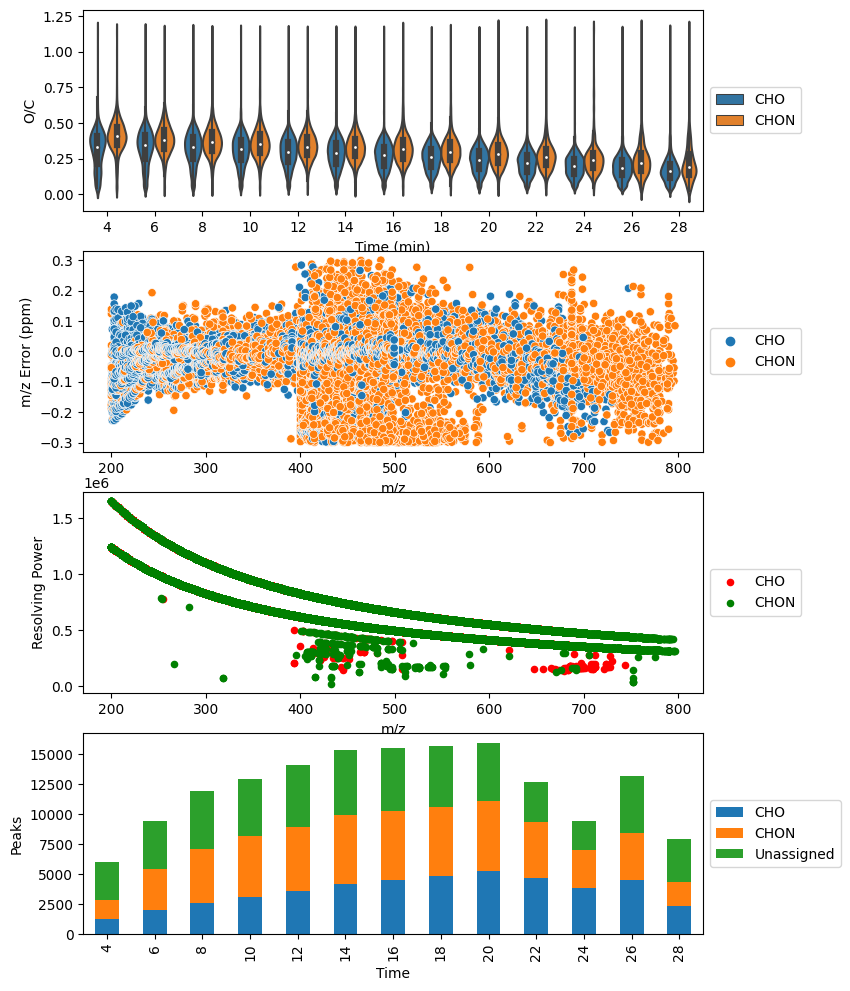

In [16]:
data.assess_all_results()

In [17]:
data_df = data.complete_results_df

data_df.to_csv("/Users/christiandewey/Downloads/spring-400-500_4N.csv")

<AxesSubplot:xlabel='m/z assignment error (ppm)', ylabel='# assigned features'>

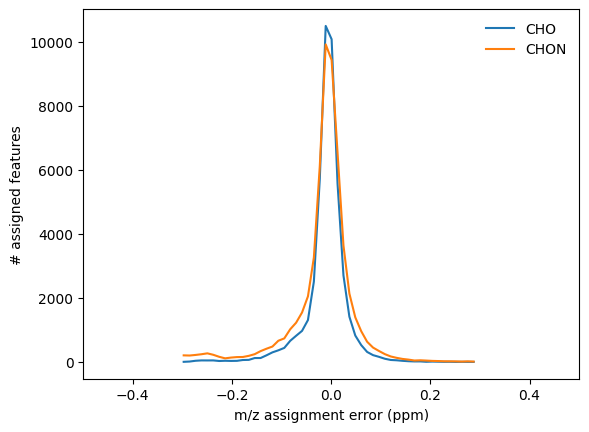

In [18]:
df_molclass = assignMolClass(data_df)

pltMZerror(df_molclass)


total # results: 160379
# unique results: 41865


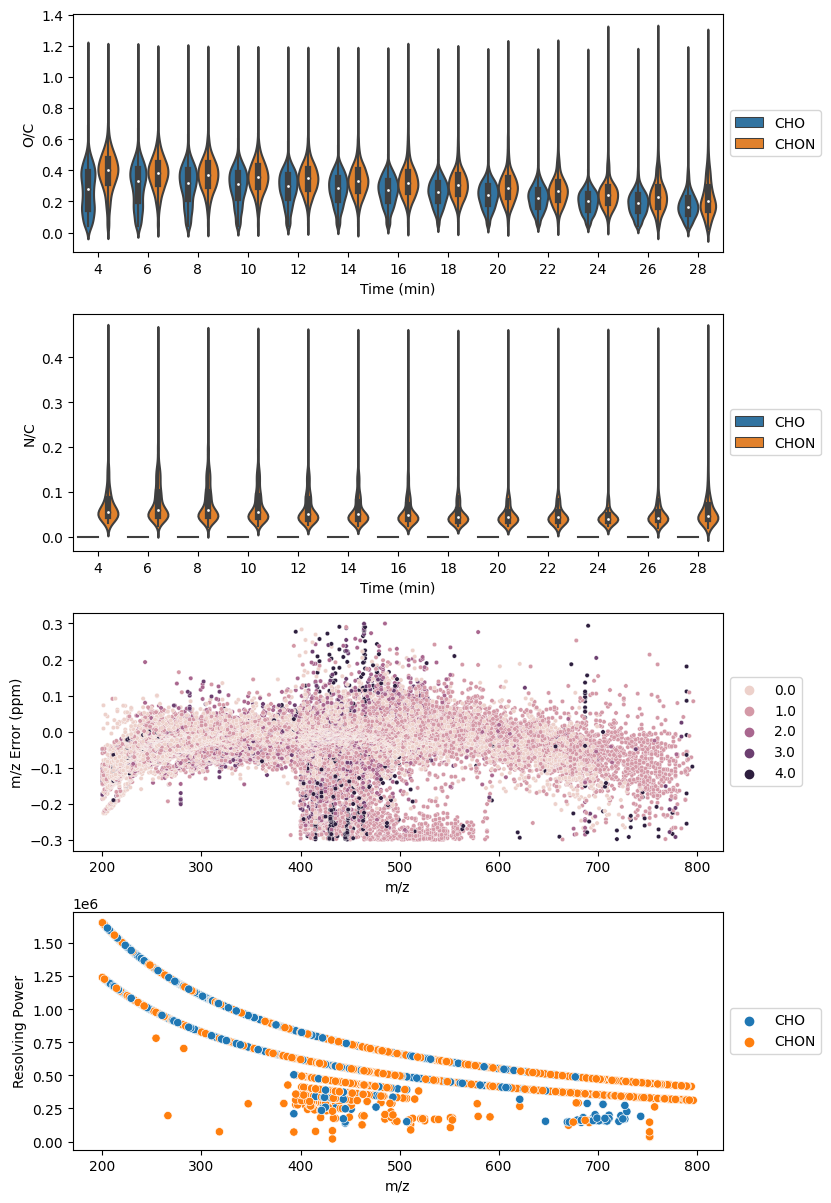

In [19]:
data.determine_unique_features(blankfile = '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw')

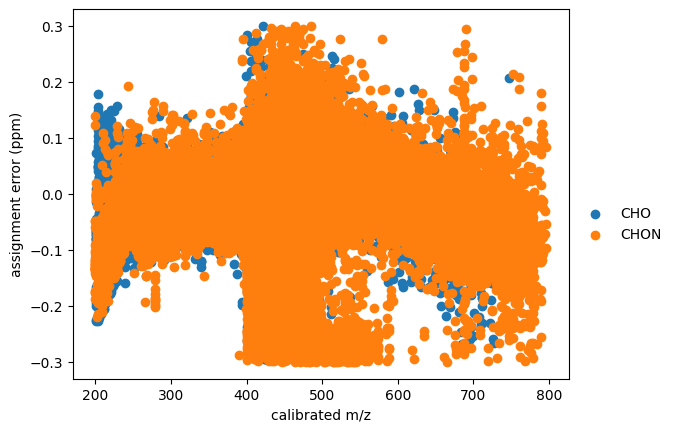

In [23]:
df1 = assignMolClass(data_df)

pltMZerror_pts(df1)

plt.show()


In [28]:
files = pd.unique(df1['file'])
print(files)

['20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz_221105013731.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500_221104214121.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz_221105005017.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_221105022444.raw']


In [29]:
nrw1 = df1[df1['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw']
nrw2 = df1[df1['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_221104214121.raw']
blk1 = df1[df1['file'] == '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw']
blk2 = df1[df1['file'] == '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500_221104214121.raw']
full1 = df1[df1['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw']
full2 = df1[df1['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz_221105005017.raw']
fnk1 = df1[df1['file'] == '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw']
fbk2 = df1[df1['file'] == '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz_221105005017.raw']

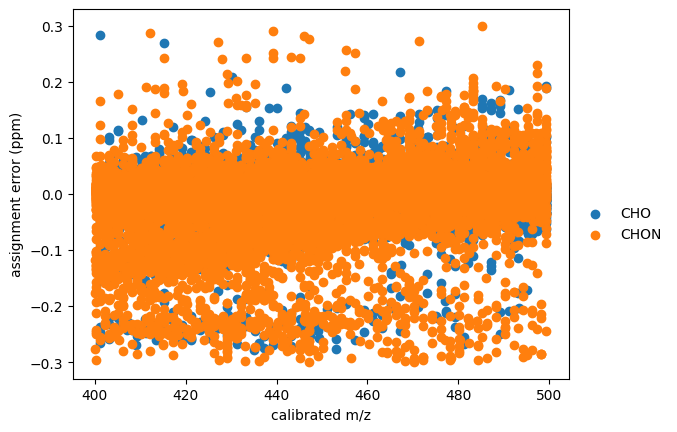

In [30]:
df1 = assignMolClass(nrw1)

pltMZerror_pts(df1)

plt.show()

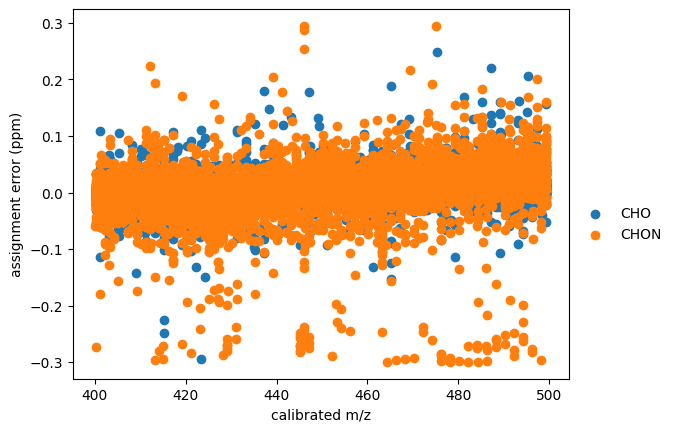

In [32]:
df1 = assignMolClass(full1)
df2 = df1[df1['m/z']>=400]
df2 = df2[df2['m/z']<=500]
pltMZerror_pts(df2)

plt.show()

In [38]:
df2 = data_df[data_df['m/z']>=400]
df2 = df2[df2['m/z']<=500]

df2_a = df2[~df2['Molecular Formula'].isnull()]

print(np.shape(df2_a))
print(np.shape(df2))

(62617, 30)
(104543, 30)


In [114]:
        
def getUniqueFeatures(df): #,blankfile,blnk_thresh=0.9):        
    #Create a list of all unique features and describe their intensity. 
    print('total # results: %s' %len(df))
    #define a list of unique features (time, formula) with 'areas' determined for each sample. There may be a slight bug that causes the unique list to grow...
    uniquelist=[]
    for time in df.Time.unique():
        current=df[df.Time==time]
        current=current.sort_values(by=['m/z Error (ppm)'],ascending=True)
        currentunique=current.drop_duplicates(subset=['Molecular Formula'])
        currentunique=currentunique[currentunique['C']>1]
        currentunique=currentunique.set_index(['Molecular Formula'],drop=False)
        for file in df['file'].unique():
            current_file=current[current['file']==file].drop_duplicates(subset=['Molecular Formula'])
            current_file=current_file.rename(columns={'Peak Height':file})
            current_file=current_file.set_index(['Molecular Formula'],drop=False)
            #current_file[file].fillna(0)
            currentunique=currentunique.join(current_file[file])
        uniquelist.append(currentunique)

    unique_results=pd.concat(uniquelist,ignore_index=True)
    unique_results['N/C']=unique_results['N']/unique_results['C']
    #unique_results['blank']=unique_results[blankfile]/unique_results['Peak Height']
    #unique_results=unique_results[unique_results['blank']<blnk_thresh]

    unique_results['m/z window'] = unique_results.index

    for file, r in zip(unique_results['file'], range(len(unique_results['file']))):

        if '400_500' in file:

            unique_results['m/z window'].iloc[r] = '400-500 m/z'
        
        elif 'full' in file:

            unique_results['m/z window'].iloc[r] = '200-1200 m/z'

    print('# unique results: %s' %len(unique_results))

    return unique_results


In [88]:
def blankSubtract(unique_results, blnkfile, blnkthresh = 0.9):

    df = unique_results

    df_bs = []

    for file in df['file'].unique():

        bs_col = 'bs_%s' %file
        df[bs_col] = df[file] / df[blnkfile]

        df_sub = df[df[bs_col] > blnkthresh]

        df_bs.append(df_sub)
    
    complete_df_bs = pd.concat(df_bs, ignore_index=True)

    return complete_df_bs
    

In [160]:
def plotUnique(unique_results,ps=50,includeBlanks=True):
    if includeBlanks is False:

        mask = unique_results['file'].str.contains('qH2O', case=False, na=False)
        unique_results=unique_results[mask]
    else:
        unique_results=unique_results

    fig, (ax2, ax3, ax4) = plt.subplots(1,3,figsize = (20,6))
    #sns.violinplot(x="Time", y="O/C", hue='mol_class', data=unique_results, ax=ax1)
    sns.scatterplot(x='m/z',y='m/z Error (ppm)', hue='m/z window', data=unique_results, ax=ax2,s=ps)
    #ax1.set(xlabel='Time (min)')
    #ax2.set(xlabel='Time (min)')
    sns.scatterplot(x='m/z',y='m/z Error (ppm)',hue='N', style='m/z window',data=unique_results,ax=ax3,s=ps)
    sns.scatterplot(x='m/z',y='Resolving Power',hue='mol_class',data=unique_results,ax=ax4)
    #ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #fig.savefig('unique_results.pdf', bbox_to_inches='tight')

    return fig

total # results: 89721
# unique results: 17766


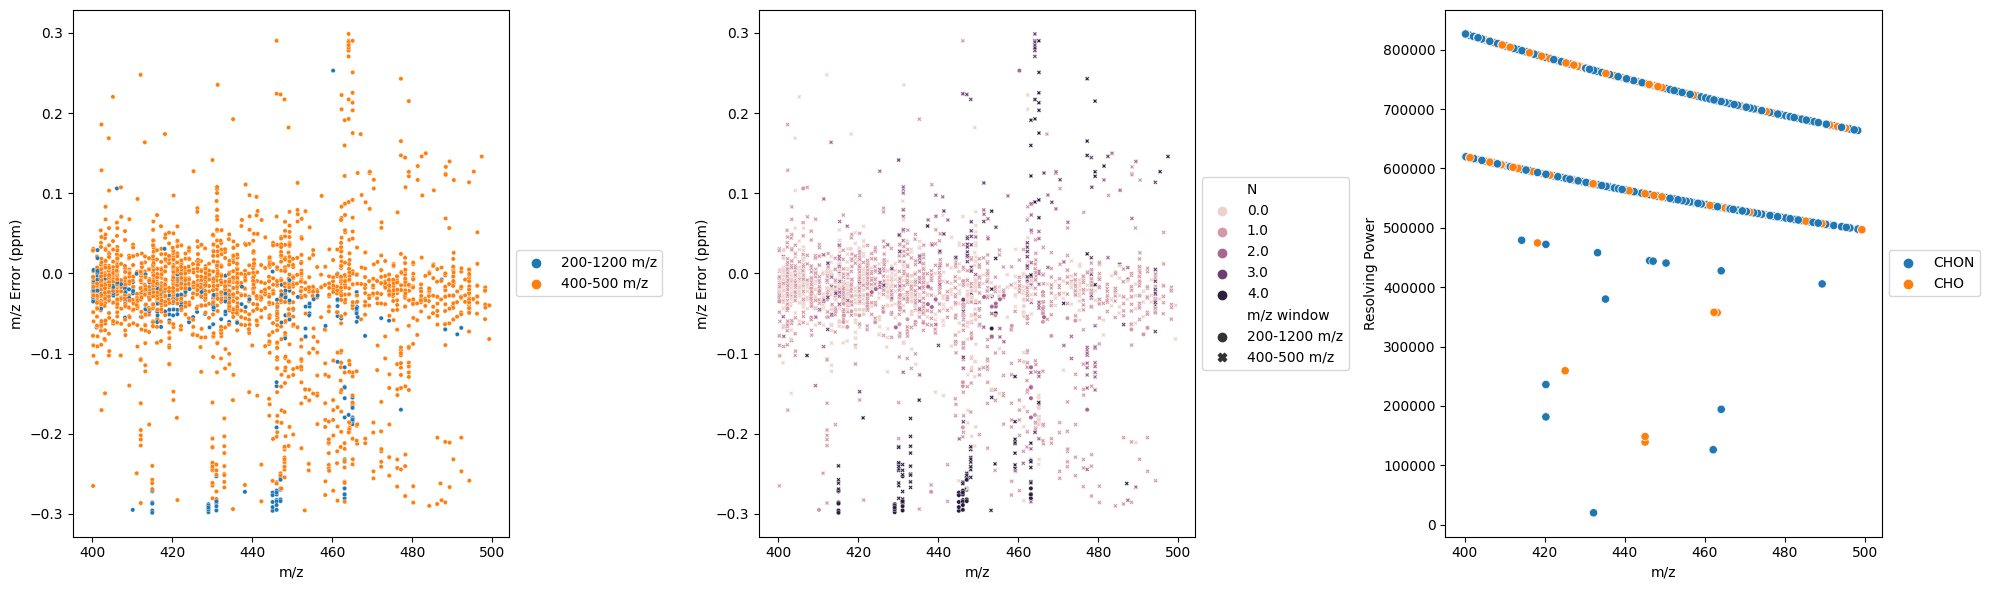

In [163]:
#fig.savefig('unique_results.pdf', bbox_to_inches='tight')

bfnrw = '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'
bfw = '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw'
df2 = data_df[data_df['m/z']>=400]
df2 = df2[df2['m/z']<=500]

df3 = assignMolClass(df2)
unique = getUniqueFeatures(df3)

fig = plotUnique(unique,ps=10,includeBlanks=False)
plt.tight_layout()
plt.show()
plt.close('all')

(2084, 49)


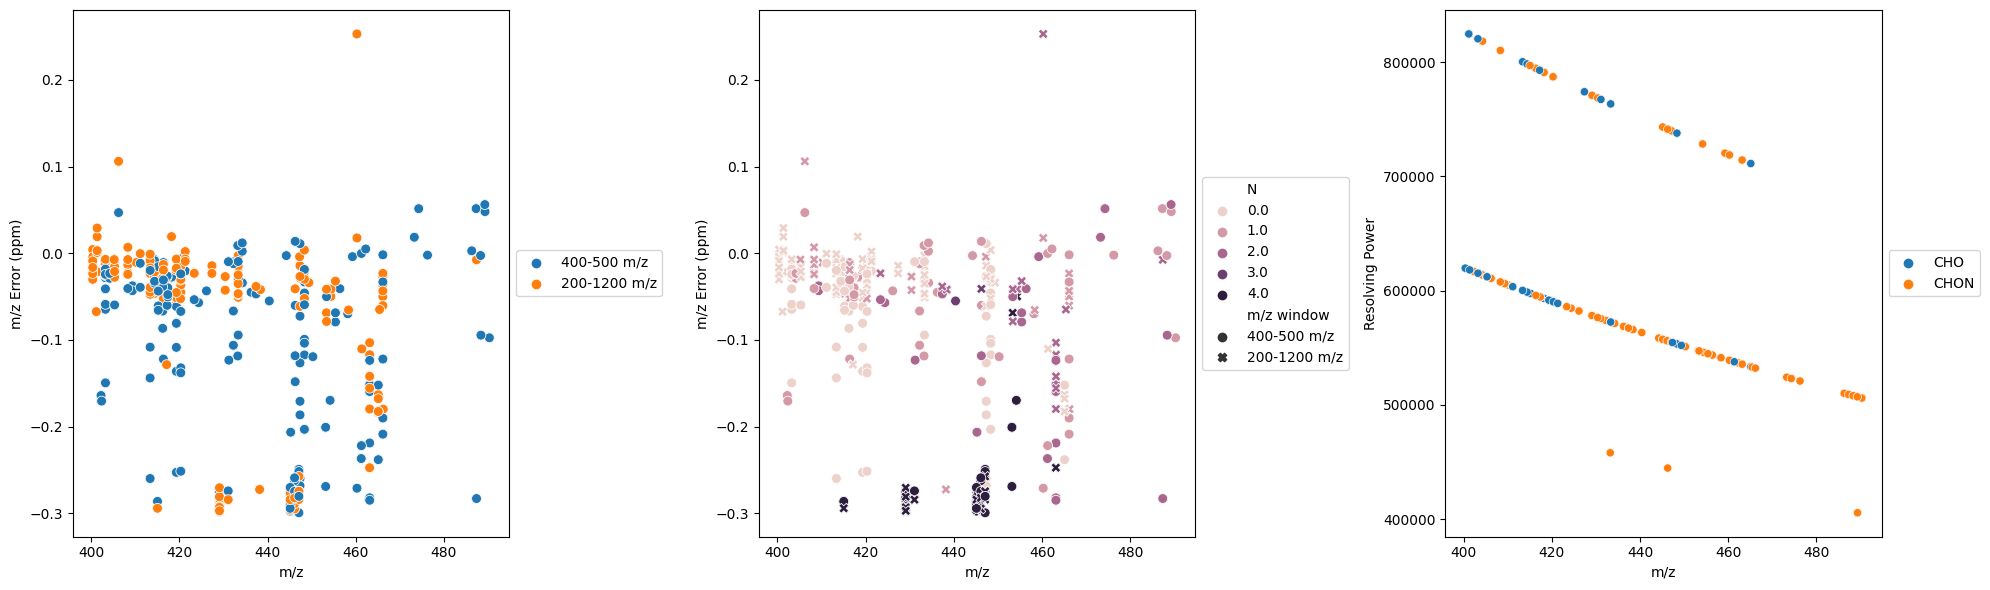

In [164]:

bsdf = blankSubtract(unique,blnkfile=bfw, blnkthresh=0.2)
print(np.shape(bsdf))
fig = plotUnique(bsdf)
plt.tight_layout()
plt.show()
plt.close('all')

In [166]:
bsdf400_500=bsdf[bsdf['m/z window'] == '400-500 m/z']
print(np.shape(bsdf400_500))

bsdf_fullmz=bsdf[bsdf['m/z window'] == '200-1200 m/z']
print(np.shape(bsdf_fullmz[abs(bsdf_fullmz['m/z Error (ppm)']) <=0.2]))

(1028, 49)
(1056, 49)


total # results: 15882
# unique results: 15882


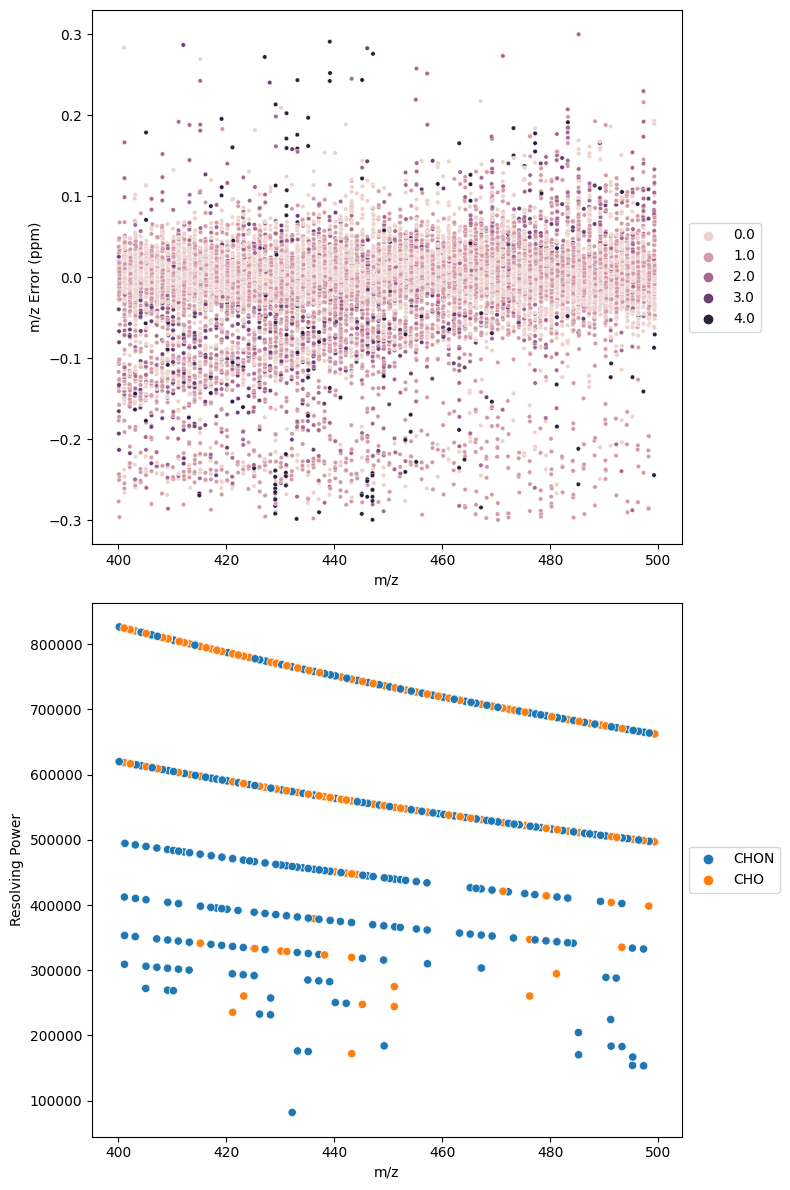

In [90]:
#fig.savefig('unique_results.pdf', bbox_to_inches='tight')

bfnrw = '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'

df3 = assignMolClass(nrw1)
unique = getUniqueFeatures(df3)

fig = plotUnique(unique)
plt.tight_layout()
plt.show()
plt.close('all')

In [ ]:

bsdf = blankSubtract(unique,blnkfile=bfw, blnkthresh=0.9)
print(np.shape(bsdf))
fig = plotUnique(bsdf)
plt.tight_layout()
plt.show()
plt.close('all')

In [45]:

def getParser(file):
    parser = rawFileReader.ImportMassSpectraThermoMSFileReader(file)
    return parser

def assign_formula(parser, interval, timerange, refmasslist=None):
    #Function to build formula assignment lists
    #Retrieve TIC for MS1 scans over the time range between 'timestart' and 'timestop' 

    tic=parser.get_tic(ms_type='MS')[0]
    tic_df=pd.DataFrame({'time': tic.time,'scan': tic.scans})

    times=list(range(timerange[0],timerange[1],interval))

    results=[]
    
    for timestart in times:

        scans=tic_df[tic_df.time.between(timestart,timestart+interval)].scan.tolist()

        mass_spectrum = parser.get_average_mass_spectrum_by_scanlist(scans)    
        mass_spectrum.molecular_search_settings.ion_charge = 1

        #mass_spectrum.mass_spectrum.settings.calib_sn_threshold
        #mass_spectrum.mass_spectrum.settings.calib_pol_order
        #mass_spectrum.recalibrate_mass_spectrum(mass_spectrum, imzmeas, mzrefs, order=2)
        #MzDomainCalibration(mass_spectrum, ref_file_location).run()

        if refmasslist:
            mass_spectrum.settings.min_calib_ppm_error = 10
            mass_spectrum.settings.max_calib_ppm_error = -10
            calfn = MzDomainCalibration(mass_spectrum, refmasslist)
            ref_mass_list_fmt = calfn.load_ref_mass_list(refmasslist)

            imzmeas, mzrefs = calfn.find_calibration_points(mass_spectrum, ref_mass_list_fmt,
                                                        calib_ppm_error_threshold=(0, 2.0),
                                                        calib_snr_threshold=3)

            calfn.recalibrate_mass_spectrum(mass_spectrum, imzmeas, mzrefs, order=2)


        SearchMolecularFormulas(mass_spectrum, first_hit=False).run_worker_mass_spectrum()

        mass_spectrum.percentile_assigned(report_error=True)

        assignments=mass_spectrum.to_dataframe()

        assignments['Time']=timestart

        results.append(assignments)
    
    results=pd.concat(results,ignore_index=True)

    return(results)    

def plot_ms(df1, start_mz, end_mz, tstart, df2=None,df3=None, assignment= None, ax_ms=None, lbls=None, norm=False, labs=False, colors=None):   
    if ax_ms == None:
        f, ax = plt.subplots()
    
    else:
        ax = ax_ms

    if colors is not None:
        cols = colors
    else:
        cols = ['C0', 'C1', 'C2']
    mzrange= end_mz - start_mz
    ms_t_int=df1[df1['Time'] == tstart]
    ms_df = ms_t_int[((ms_t_int['Calibrated m/z']-start_mz)<mzrange) & ((ms_t_int['Calibrated m/z']-start_mz)>0)]

    maxdf1 = max(ms_df['S/N'])

    if norm:
        ms_df['S/N Norm'] = ms_df['S/N'] / maxdf1
    else:
        ms_df['S/N Norm'] = ms_df['S/N'] 

    

    print(ms_df['S/N Norm'])

    if lbls is not None:
        labels = lbls
    else:
        lbls = [None, None, None]

 
    _, stemlines1, _ =ax.stem('Calibrated m/z','S/N Norm',data=ms_df,  markerfmt=' ', basefmt=' ', linefmt=cols[0], label = labels[0])
    
    if df2 is not None:
        ms_t_int2=df2[df2['Time'] == tstart]
        ms_df2 = ms_t_int2[(abs(ms_t_int2['Calibrated m/z']-start_mz)<mzrange)& ((ms_t_int2['Calibrated m/z']-start_mz)>0)]

        maxdf2 = max(ms_df2['S/N'])

        if norm:
            ms_df2['S/N Norm'] = ms_df2['S/N'] / maxdf2
        else:
            ms_df2['S/N Norm'] = ms_df2['S/N'] 
        
        _, stemlines2, _ =ax.stem('Calibrated m/z','S/N Norm',data=ms_df2,  markerfmt=' ', basefmt=' ', linefmt=cols[1], label = labels[1])

    if df3 is not None:
        ms_t_int3=df3[df3['Time'] == tstart]
        ms_df3 = ms_t_int3[(abs(ms_t_int3['Calibrated m/z']-start_mz)<mzrange)& ((ms_t_int3['Calibrated m/z']-start_mz)>0)]

        maxdf3 = max(ms_df3['S/N'])

        if norm:
            ms_df3['S/N Norm'] = ms_df3['S/N'] / maxdf3
        else:
            ms_df3['S/N Norm'] = ms_df3['S/N'] 
        
        _, stemlines3, _ =ax.stem('Calibrated m/z','S/N Norm',data=ms_df3,  markerfmt=' ', basefmt=' ', linefmt=cols[2], label = labels[2])
    
    if df3 is not None:
        ax.set_ylim(0, max([maxdf1, maxdf2, maxdf3]) * 1.1)
    elif df2 is not None:
        ax.set_ylim(0, max([maxdf1, maxdf2]) * 1.1)
    else: 
        ax.set_ylim(0, maxdf1 * 1.1)

    ax.set_xlim(left = start_mz - mzrange*0.1, right = start_mz + mzrange + mzrange*0.1) 

    if labs:
        for mzr,peakr,mf,er in zip(ms_df['Calibrated m/z'], ms_df['S/N Norm'], ms_df['Molecular Formula'],  ms_df['m/z Error (ppm)']):

            #if (mzr- target_mz)  == 0:
            #    mz_text = ' m/z\n%.4f' % (mzr)
            #else:
            #    mz_text = r'$\Delta$' + ' m/z\n%.4f' % (mzr- target_mz)

            mz_text = 'm/z %.4f\n%s\n%.3f ppm' % (mzr,mf,er)
            ax.text(mzr, peakr + 0.02 *max(ms_df['S/N Norm']), mz_text, ha = 'center', fontsize = 'xx-small', weight = 'bold', color=cols[0])

        if df2 is not None:

            for mzr,peakr,mf, er in zip(ms_df2['Calibrated m/z'], ms_df2['S/N Norm'], ms_df2['Molecular Formula'], ms_df2['m/z Error (ppm)']):

            #if (mzr- target_mz)  == 0:
            #    mz_text = ' m/z\n%.4f' % (mzr)
            #else:
            #    mz_text = r'$\Delta$' + ' m/z\n%.4f' % (mzr- target_mz)

                mz_text = 'm/z %.4f\n%s\n%.3f ppm' % (mzr,mf,er)
                ax.text(mzr, peakr + 0.02 *max(ms_df2['S/N Norm']), mz_text, ha = 'center', fontsize = 'xx-small', weight = 'bold', color = cols[1])

        if df3 is not None:

            for mzr,peakr,mf, er in zip(ms_df3['Calibrated m/z'], ms_df3['S/N Norm'], ms_df3['Molecular Formula'], ms_df3['m/z Error (ppm)']):

            #if (mzr- target_mz)  == 0:
            #    mz_text = ' m/z\n%.4f' % (mzr)
            #else:
            #    mz_text = r'$\Delta$' + ' m/z\n%.4f' % (mzr- target_mz)

                mz_text = 'm/z %.4f\n%s\n%.3f ppm' % (mzr,mf,er)
                ax.text(mzr, peakr + 0.02 *max(ms_df3['S/N Norm']), mz_text, ha = 'center', fontsize = 'xx-small', weight = 'bold', color = cols[2])

   # theor_mz=pattern.mdiff+result['mass']
   # theor_int=pattern.ratio*result['abundance']
   # ax.stem(theor_mz,theor_int, basefmt=' ',linefmt='gray')

   # for isotope in pattern.isotope[pattern.requirement=='Y']:
   #     ax.stem('mz','intense',data=result[isotope],  markerfmt=' ', basefmt=' ',linefmt='red')
    if ax == None:

        ax.legend(('other', 'target'),bbox_to_anchor=(1.05, 1.0), loc='upper left',frameon=False)

        if(assignment):

            mf = assignment[0]
            score = assignment[1]
            er = assignment[2]

            ax.text(1.05,0.7,mf,transform=ax.transAxes)
            ax.text(1.05,0.6,'Error (ppm) = %.3f ' %er ,transform=ax.transAxes)
            ax.text(1.05,0.5,'Score = %.3f' %score ,transform=ax.transAxes)

    if norm: 
        ax.set(xlabel='Calibrated m/z',ylabel='Normalized S/N')
    else: 
        ax.set(xlabel='Calibrated m/z',ylabel='S/N')
    #ax.set_title('%.2f' %timerange[0] + ' to %.2f' %timerange[1] +' min', fontsize = 'medium')
    ax.legend(bbox_to_anchor = (1.00, 0.5), frameon =False, loc = 'center left')
    ax.axhline(y=0.0, color='black')
    plt.setp(stemlines1,'color', cols[0], 'linewidth', 2)
    if df2 is not None:
        plt.setp(stemlines2, 'color', cols[1],'linewidth', 2)
    if df3 is not None:
        plt.setp(stemlines3, 'color', cols[2],'linewidth', 2)
    plt.tight_layout()
    if ax_ms == None:
        return ax


def filterMzRange(results, mz_range):

    mz_i = mz_range[0]
    mz_f = mz_range[1]

    sub = results[(results['m/z'] >= mz_i) & (results['m/z'] <= mz_f)]

    return sub


def pltMZerror(results, bins=50):
    ## assignment error distribution
    _, ax = plt.subplots()
    for mol_class in sorted(results['mol_class'].unique()):

        counts, bins = np.histogram(np.asarray(results[results['mol_class']==mol_class]['m/z Error (ppm)']),bins = bins)

        ax.plot(bins[:-1], counts, label = mol_class)

    ax.set_xlim(-0.5,0.5)
    ax.legend(frameon=False)
    ax.set_xlabel('m/z assignment error (ppm)')
    ax.set_ylabel('# assigned features')

    return ax

def pltMZerror_pts(results):
    ## assignment error distribution
    _, ax = plt.subplots()
    for mol_class in sorted(results['mol_class'].unique()):

        ax.scatter(results[results['mol_class']==mol_class]['Calibrated m/z'], results[results['mol_class']==mol_class]['m/z Error (ppm)'], label = mol_class)

    #ax.set_xlim(-0.5,0.5)
    ax.legend(frameon=False,bbox_to_anchor=(1.0, 0.5))
    ax.set_xlabel('calibrated m/z')
    ax.set_ylabel('assignment error (ppm)')

    return ax

def assignMolClass(resultsdf, mz_cutoff = 800, sn_lim = 3):

    filtered_results=resultsdf[(resultsdf['m/z']<mz_cutoff) & (resultsdf['S/N']>sn_lim)]

    filtered_results['N']=filtered_results['N'].fillna(0)
    filtered_results['O']=filtered_results['O'].fillna(0)
    #filtered_results['S']=filtered_results['S'].fillna(0)
    #filtered_results['P']=filtered_results['Fe'].fillna(0)
    #filtered_results['Cu']=filtered_results['Cu'].fillna(0)

    filtered_results['mol_class']='Unassigned'
    filtered_results['mol_class'][filtered_results['C']>0]='CHO'
    filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['N']>0.5)]='CHON'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['S']>0.5)]='CHOS'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Fe']>0.5)]='CHOFe'
    #iltered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Cu']>0.5)]='CHOCu'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Cu']>0.5) & (filtered_results['N']>0.5)]='CHONCu'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Cu']>0.5) & (filtered_results['S']>0.5)]='CHOSCu'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Na']>0.5) & (filtered_results['N']>0.5)]='CHONNa'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['P']>0.5) & (filtered_results['Na']>0.5) & (filtered_results['N']>0.5)]='CHONPNa'


    results= filtered_results #[filtered_results['mol_class'] != 'Unassigned'] #[filtered_results['Is Isotopologue']==0]
    results['N/C']=results['O']/results['C']
    results['H/C']=results['H']/results['C']
    results['N/C']=results['N']/results['C']

    return results


In [ ]:
# 1: assign formula to full scan 
MSParameters.mass_spectrum.threshold_method = 'signal_noise'
MSParameters.mass_spectrum.s2n_threshold = 2
MSParameters.ms_peak.peak_min_prominence_percent = 0.001

MSParameters.molecular_search.error_method = 'None'
MSParameters.molecular_search.min_ppm_error = -0.3
MSParameters.molecular_search.max_ppm_error = 0.3

MSParameters.molecular_search.isProtonated = True
MSParameters.molecular_search.isRadical = False
MSParameters.molecular_search.isAdduct = False

MSParameters.molecular_search.score_method = "prob_score"
MSParameters.molecular_search.output_score_method = "prob_score"


MSParameters.molecular_search.url_database = None
MSParameters.molecular_search.min_dbe = -1
MSParameters.molecular_search.max_dbe = 20

MSParameters.molecular_search.usedAtoms['C'] = (1,50)
MSParameters.molecular_search.usedAtoms['H'] = (4,100)
MSParameters.molecular_search.usedAtoms['O'] = (1,20)
MSParameters.molecular_search.usedAtoms['N'] = (0,6)
MSParameters.molecular_search.usedAtoms['Cu'] = (0,1)
MSParameters.molecular_search.usedAtoms['S'] = (0,1)


In [ ]:

data2='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring/20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw'
data1='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring/20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw'
qh2o='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring/20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'


refmasslist = '/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref'

savedir = '/Users/christiandewey/Desktop/221107-CoreMS'

trange = [4,28]
interval = 2
parser1 = getParser(data1)  #fullmz
results1 = assign_formula(parser1,interval=interval,timerange=trange, refmasslist=refmasslist)



In [20]:
fresults1 = assignMolClass(results1)

pltMZerror_pts(fresults1)

plt.show()


NameError: name 'results1' is not defined

In [ ]:
#trange = [12,14]
#interval = 2
parser2 = getParser(data2)  #400-500mz
results2 = assign_formula(parser2,interval=interval,timerange=trange, refmasslist=refmasslist)



In [ ]:
fresults2 = assignMolClass(results2)

pltMZerror(fresults2, bins=75)

plt.show()

In [ ]:
pltMZerror_pts(fresults2)

plt.show()

In [ ]:
#trange = [12,14]
#interval = 4

qh2o_parser = getParser(qh2o)
qh2o_results = assign_formula(qh2o_parser,interval=interval,timerange=trange, refmasslist=refmasslist )

In [ ]:
fresults3 = assignMolClass(qh2o_results)

pltMZerror(fresults3, bins=75)

plt.show()

In [ ]:

## filter molform 
sub = filterMzRange(results1,[400,500])

blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]


In [ ]:


sn_lim = 20
df2=narrow_unique[narrow_unique['S/N']<sn_lim]

df1=blank_subtracted_full[blank_subtracted_full['S/N']<sn_lim]
df2=narrow_unique[narrow_unique['S/N']<sn_lim]
df3=overlap[overlap['S/N']<sn_lim]


df2a = sub[sub['Molecular Formula'].notna()]
df2b = sub[sub['Molecular Formula'].isna()]

n_mzs = np.shape(sub)[0]

per_a = np.shape(df2a)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100
per_b = np.shape(df2b)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100

plot_ms(df2a,df2=df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=['Assigned', 'Unassigned'],labs=False) 

plt.title('200-1200 m/z window, %s peaks, %.2f%% assigned' %(n_mzs, per_a))
plt.show()






In [ ]:


df2a = results2[results2['Molecular Formula'].notna()]
df2b = results2[results2['Molecular Formula'].isna()]

n_mzs = np.shape(results2)[0]

per_a = np.shape(df2a)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100
per_b = np.shape(df2b)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100

plot_ms(df2a,df2=df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=['Assigned', 'Unassigned' ],labs=False) 

plt.title('400-500 m/z window, %s peaks, %.2f%% assigned' %(n_mzs, per_a))
plt.show()

In [ ]:

df2a = results2 #[results2['Molecular Formula'].notna()]
df2b = sub #[sub['Molecular Formula'].notna()]

n_mzs = np.shape(results2)[0]

per_a = np.shape(df2a)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100
per_b = np.shape(df2b)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100

plot_ms(df2a,df2=df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=['400-500 m/z', '150-2000 m/z' ],labs=False, colors=['C3','C7']) 

plt.title('Comparison of S/N')
plt.show()

In [ ]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2a = overlap #[results2['Molecular Formula'].notna()]
df2b = narrow_unique #[sub['Molecular Formula'].notna()]

n_mzs = np.shape(results2)[0]

per_a = np.shape(df2a)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100
per_b = np.shape(df2b)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100

plot_ms(df2a,df2=df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=['Both windows', 'Only 400-500 m/z' ],labs=False,colors=['C7','C3']) 

plt.title('Assigned features')
plt.show()

In [ ]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2a = overlap#[overlap['S'] > 0]
df2b = narrow_unique#[narrow_unique['S'] > 0] #[sub['Molecular Formula'].notna()]



plot_ms(df2a,df2=df2b, start_mz=451,end_mz = 451.5, tstart = 16, lbls=['Both windows', 'Only 400-500 m/z' ],labs=False,colors=['C7','C3']) 

plt.title('Assigned features')
plt.show()

In [ ]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2a = overlap[overlap['Cu'] > 0]
df2b = narrow_unique[narrow_unique['Cu'] > 0] #[sub['Molecular Formula'].notna()]
df2c = df2b[df2b['13C'] > 0]



plot_ms(df2a,df2=df2b,df3=df2c, start_mz=400,end_mz = 500, tstart = 16, lbls=['Both windows', '400-500 m/z mono', '400-500 m/z 13C' ],labs=False) 

plt.title('Assigned features containing Cu')
plt.show()

In [ ]:
df2a_f = assignMolClass(df2a)

fig, ax = plt.subplots()
ax.scatter(x=df2a_f['N/C'],y=df2a_f['O/C'],s=df2a['Peak Height']/100,c='C3',label='400-500 m/z')
ax.set(xlabel='O/C',ylabel='N/C')
ax.set_xlim(0,1.2)
ax.set_ylim(0,0.5)
#ax.legend(frameon=False)
plt.show()

In [ ]:


plot_ms(df2c, start_mz=400,end_mz = 500, tstart = 16, lbls=[ '400-500 m/z 13C' ],labs=True) 

plt.title('Assigned  features detected in 400-500 m/z')
plt.show()

In [ ]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2b = narrow_unique[narrow_unique['Cu'] > 0] #[sub['Molecular Formula'].notna()]
df2a = overlap[overlap['Cu'] > 0] #[sub['Molecular Formula'].notna()]


plot_ms(df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=[ '' ],labs=True,colors=['C1']) 

plot_ms(df2a, start_mz=400,end_mz = 500, tstart = 16, lbls=[ '' ],labs=True,colors=['C0']) 


plt.title('Assigned Cu features detected in 400-500 m/z')
plt.show()

In [ ]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2a = narrow_unique[narrow_unique['Cu'] > 0] #[sub['Molecular Formula'].notna()]

df2b = blank_subtracted_n.loc[blank_subtracted_n['Index'].isin(df2a['Mono Isotopic Index'] )]
print(np.shape(df2b))

plot_ms(df2a, df2=df2b,start_mz=422,end_mz = 424, tstart = 16, lbls=[ '13C isotopologue', 'Monoisotopic' ],labs=True) 

plt.title('Assigned 13C features detected in 400-500 m/z')
plt.show()

In [ ]:
## van Krevelen plots 
## N/C, H/C
sub = filterMzRange(fresults1,[400,500])
fig, ax = plt.subplots()
ax.scatter(x=fresults2['N/C'],y=fresults2['N/C'],s=fresults2['Peak Height']/4000,c='C3',label='400-500 m/z')
ax.scatter(x=sub['N/C'],y=sub['N/C'],s=sub['Peak Height']/4000,c='C7',label='Both windows')
ax.set(xlabel='N/C',ylabel='N/C')
ax.legend(frameon=False)
plt.show()

In [ ]:

## O/C, N/C

sub = filterMzRange(fresults1,[400,500])
fig, ax = plt.subplots()
ax.scatter(x=fresults2['O/C'],y=fresults2['N/C'],s=fresults2['Peak Height']/4000,c='C3',label='400-500 m/z')
ax.scatter(x=sub['O/C'],y=sub['N/C'],s=sub['Peak Height']/4000,c='C7',label='Both windows')
ax.set(xlabel='O/C',ylabel='N/C')
ax.legend(frameon=False)
plt.show()

In [ ]:
## van Krevelen plots 
## O/C, N/C
sub = filterMzRange(fresults1,[400,500])
fig, ax = plt.subplots()
ax.scatter(x=fresults2['O/C'],y=fresults2['N/C'],s=fresults2['Peak Height']/4000,c='C3',label='400-500 m/z')
ax.scatter(x=sub['O/C'],y=sub['N/C'],s=sub['Peak Height']/4000,c='C7',label='Both windows')
ax.set(xlabel='O/C',ylabel='N/C')
ax.legend(frameon=False)
plt.show()